<a href="https://colab.research.google.com/github/ismailakbas/CS304/blob/main/HW3_Q2_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 - Question 2

### Guidance

On Question 2 we will intialize wine data along with its class labels.

## Part a) ##

In [59]:
import pandas as pd

# For information on the Wine dataset see:  https://archive.ics.uci.edu/dataset/109/wine

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Splitting the data into 70% training and 30% test subsets.



In [60]:
from sklearn.model_selection import train_test_split

X = df_wine.iloc[:, 1:]
y = df_wine.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Standardizing the data.

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


# PCA #

Find PCA transform using training data and print the explained variance ratios

## Part b) ##

In [62]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

print(pca.explained_variance_ratio_)


[0.36196226 0.18763862 0.11656548 0.07578973 0.07043753 0.04552517
 0.03584257 0.02646315 0.02174942 0.01958347 0.01762321 0.01323825
 0.00758114]


Total and explained variance ratios and the total variance explained

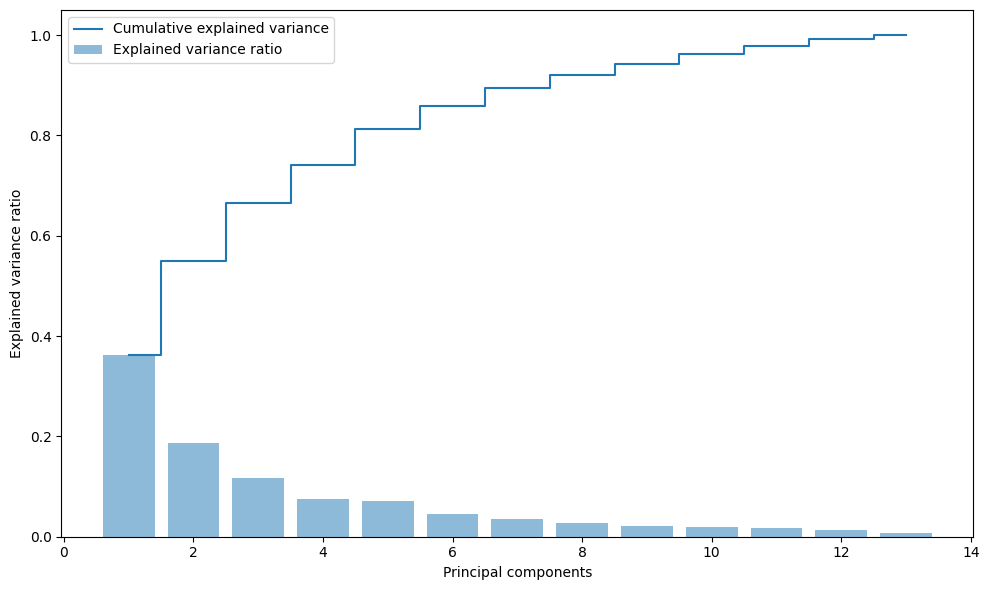

Total variance explained: 0.9999999999999998


In [63]:
import matplotlib.pyplot as plt
import numpy as np


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Explained variance ratio')
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


total_variance_explained = np.sum(explained_variance_ratio)
print("Total variance explained:", total_variance_explained)


## Part c) ##

Reduce dimensionality to 2 using PCA

In [64]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


Plot the projected data in 2D

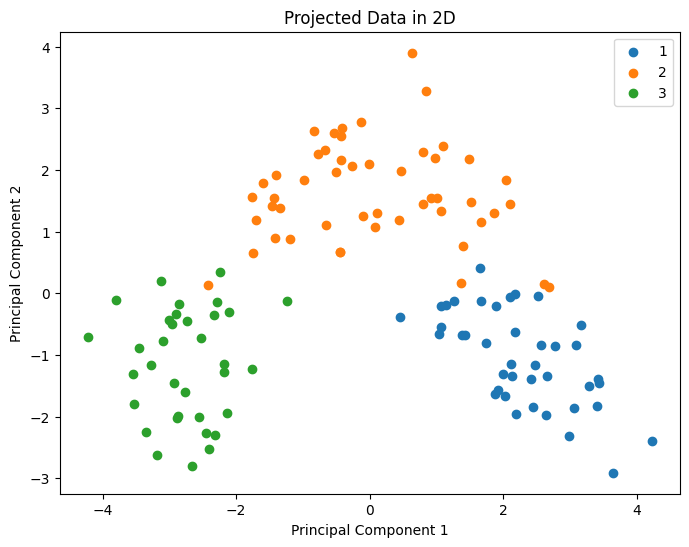

In [65]:

plt.figure(figsize=(8, 6))
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data in 2D')
plt.legend()
plt.show()




In [66]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])


    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

## Part d) ##

Training logistic regression classifier using the first 2 principal components.

Print the accuracy on the training set

In [67]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

accuracy = lr.score(X_train_pca, y_train)
print("Accuracy on the training set:", accuracy)


Accuracy on the training set: 0.9596774193548387


Plot the decision regions

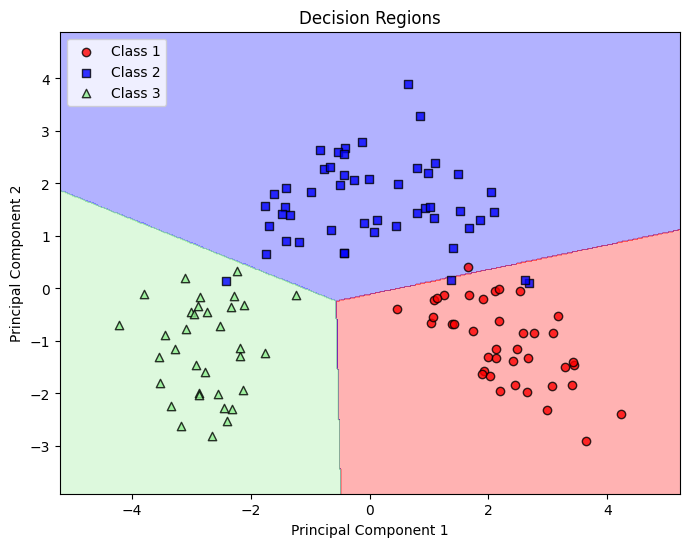

In [68]:

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Regions')
plt.legend(loc='upper left')
plt.show()


## Part e) ##

Classify the test data and plot decision regions

Print the accuracy on the test set

Accuracy on the test set: 0.9629629629629629


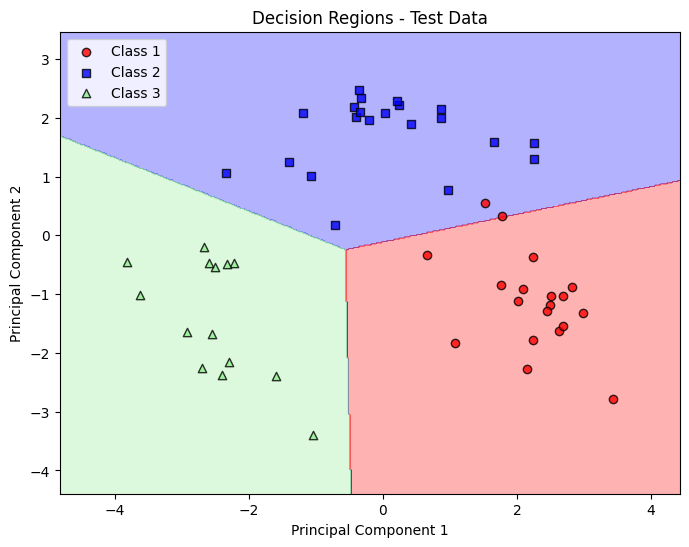

In [69]:

y_pred = lr.predict(X_test_pca)

accuracy_test = lr.score(X_test_pca, y_test)
print("Accuracy on the test set:", accuracy_test)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Regions - Test Data')
plt.legend(loc='upper left')
plt.show()


# LDA #

## Part f) ##

Reduce the dimensionality to 2 using LDA

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda = LDA(n_components=2)


X_train_lda = lda.fit_transform(X_train_std, y_train)


X_test_lda = lda.transform(X_test_std)


Accuracy on the training set (with LDA): 1.0


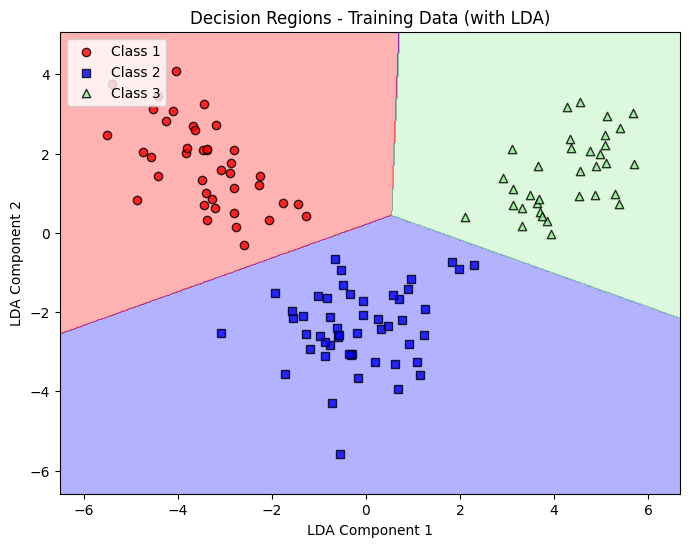

In [71]:
from sklearn.linear_model import LogisticRegression


lr_lda = LogisticRegression()
lr_lda.fit(X_train_lda, y_train)


accuracy_train_lda = lr_lda.score(X_train_lda, y_train)
print("Accuracy on the training set (with LDA):", accuracy_train_lda)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_lda, y_train, classifier=lr_lda)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Decision Regions - Training Data (with LDA)')
plt.legend(loc='upper left')
plt.show()


Transform and classify the test data

Plot the decision regions

Print the accuracy on the test set

Accuracy on the test set (with LDA): 0.9814814814814815


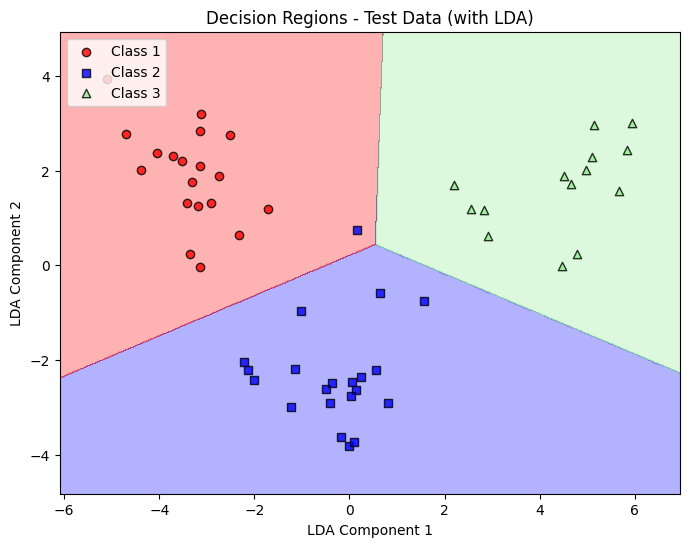

In [72]:

y_pred_lda = lr_lda.predict(X_test_lda)

accuracy_test_lda = lr_lda.score(X_test_lda, y_test)
print("Accuracy on the test set (with LDA):", accuracy_test_lda)


plt.figure(figsize=(8, 6))
plot_decision_regions(X_test_lda, y_test, classifier=lr_lda)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Decision Regions - Test Data (with LDA)')
plt.legend(loc='upper left')
plt.show()


## Part g) Comment on your the results using PCA and LDA ##

Write your comments here

# t-NSE: Visualize the Wine dataset using t-SNE #

In [73]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)


X_train_std_tsne = tsne.fit_transform(X_train_std)


Visualize the 2D data

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


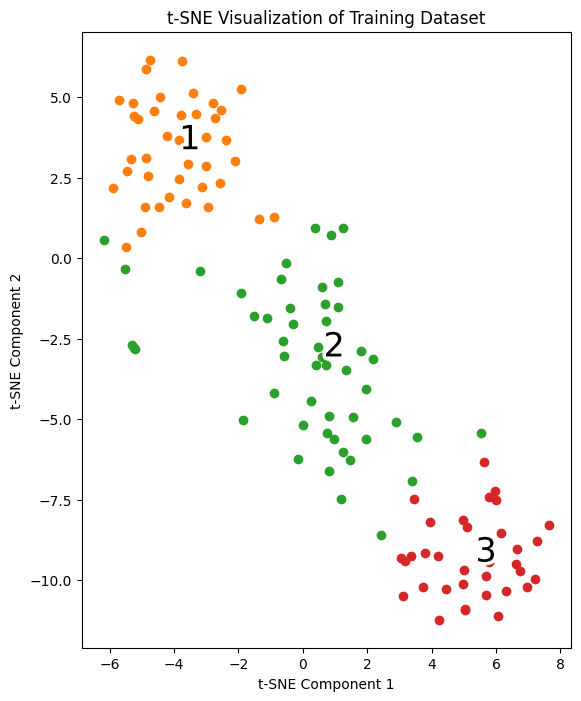

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as PathEffects

def visualize_clusters_with_labels(data, labels):

    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')


    for i in range(10):

        plt.scatter(data[labels == i, 0], data[labels == i, 1])


    for i in range(10):

        x_text, y_text = np.median(data[labels == i, :], axis=0)

        txt = ax.text(x_text, y_text, str(i), fontsize=24)

        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])


visualize_clusters_with_labels(X_train_std_tsne, y_train)


plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Training Dataset')


plt.show()
